In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from matplotlib import gridspec
import sys 
import os
py_script = "/Users/jbrown/OneDrive - Queen's University Belfast/STIRAP_RL/STIRAP_Utils"
if py_script is not sys.path:
    sys.path.append(py_script)
from ctap_evolution import CTAP
from matplotlib import gridspec
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)



In [115]:
ctap = CTAP(alpha=1, beta=3, omega_max=75, num_levels=3)

Anti
Maximum rho_22: 0.9932031230780579
Maximum rho_11: 0.06734458916656356
Average rho_11: 0.007447877553663554


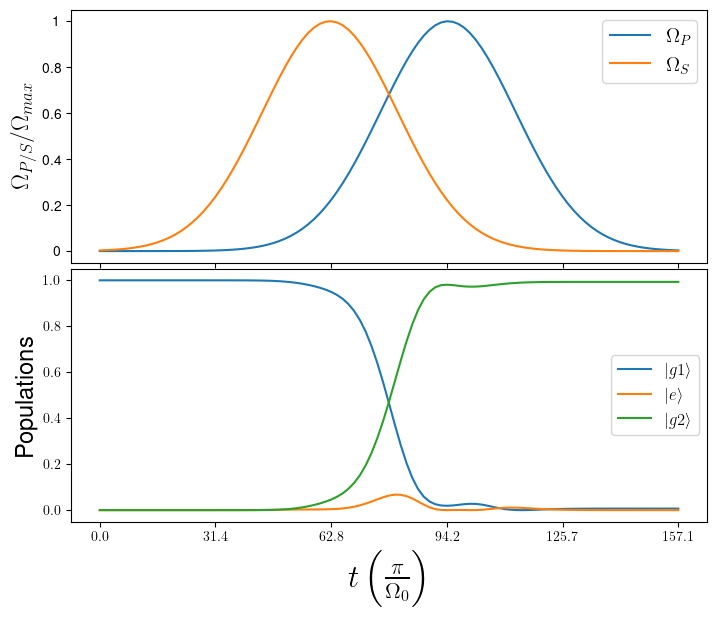

In [246]:
fact=(0.33333)*np.pi

def gaussian(mean, var, t):
    return ctap.omega_max*np.exp(-(t-mean)**2/(2*var**2))
T = 50*np.pi
oper_time = 7*np.pi
width = 0.833*oper_time
Pulse_delay = 1.75*width
times1 = np.linspace(0,T,101)
pulse = [gaussian((T/2+(Pulse_delay/2)),width,i) for i in times1]
stokes = [gaussian((T/2-(Pulse_delay/2)),width,i) for i in times1]

rho, _ = ctap.initial_state()

populations3 = np.zeros((3,len(times1)))
for i in range(len(times1)):
    rho_new, reduced_rho_new = ctap.evolve(rho, [pulse[i], stokes[i]],detuning=False, 
                                            detuning_percent=0.0, detuning_fixed=True, 
                                            dephasing=False, dephasing_sigma=0, 
                                            timestep=0.01)
    populations3[:,i] = reduced_rho_new[:]
    rho = rho_new

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, squeeze=True, figsize = (7,6))


ax1.plot(times1, pulse, label=r"$\Omega_P$")
ax1.plot(times1, stokes, label=r"$\Omega_S$")
ax1.set_ylabel(r"$\Omega_{P/S} /\Omega_{max}$", fontsize = "xx-large")
ax1.set_xticks([])
ax1.set_yticks([0,15,30,45,60,75])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax1.legend(fontsize="x-large")
ax2.plot(times1, populations3[0,:], label=r"$|g1\rangle$")
ax2.plot(times1, populations3[1,:], label=r"$|e\rangle$")
ax2.plot(times1, populations3[2,:], label=r"$|g2\rangle$")
ax2.legend(fontsize="large")
ax2.set_xlabel(r"$t  \left( \frac{\pi}{\Omega_{0}} \right)$", fontsize=23)
ax2.set_ylabel(r"Populations", fontsize="xx-large")
ax2.set_xticks(np.arange(6)*(T/5))
# ax2.set_xticklabels([0,15,30,45,60,75])
plt.tight_layout(pad=0.1)

print("Anti")
print("Maximum rho_22:", np.max(populations3[2,:]))
print("Maximum rho_11:", np.max(populations3[1,:]))
print("Average rho_11:", np.average(populations3[1,:]))




STANDARD
Maximum rho_22: 0.9256945529398573
Maximum rho_11: 0.23525049039690318
Average rho_11: 0.03835830287270482


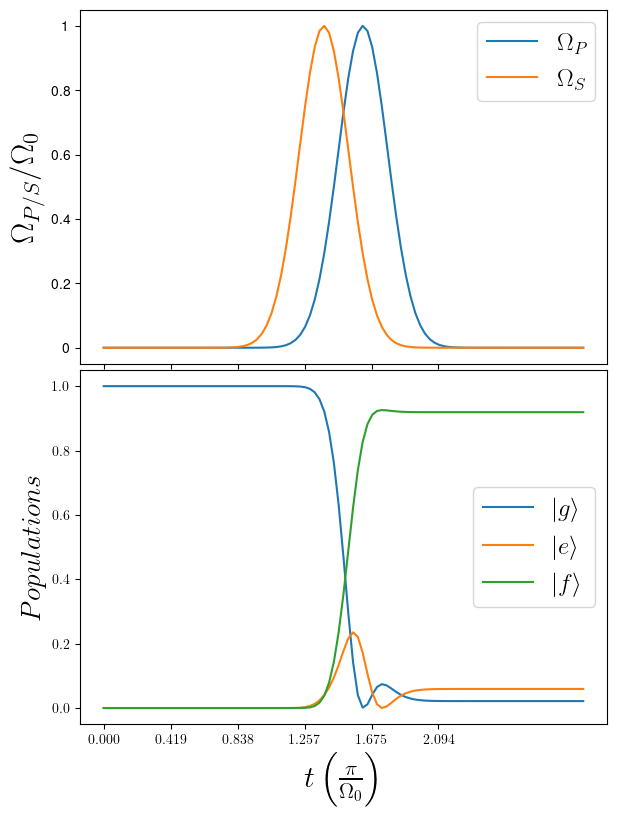

In [121]:


def gaussian(mean, var, t):
    return ctap.omega_max*np.exp(-(t-mean)**2/(2*var**2))

Pulse_delay=0.245
width = 0.155
times = np.linspace(0,3,101)
pulse = [gaussian((1.5+(Pulse_delay/2)),width,i) for i in times]
stokes = [gaussian((1.5-(Pulse_delay/2)),width,i) for i in times]

rho, _ = ctap.initial_state()

populations = np.zeros((3,len(times)))
for i in range(len(times)):
    rho_new, reduced_rho_new = ctap.evolve(rho, [pulse[i], stokes[i]],detuning=False, 
                                            detuning_percent=0, detuning_fixed=True, 
                                            dephasing=False, dephasing_sigma=0, 
                                            timestep=0.01)
    populations[:,i] = reduced_rho_new[:]
    rho = rho_new

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, squeeze=True, figsize = (6,8))


ax1.plot(times, pulse, label=r"$\Omega_P$")
ax1.plot(times, stokes, label=r"$\Omega_S$")
ax1.set_ylabel(r"$\Omega_{P/S} /\Omega_{0}$", fontsize = 23)
ax1.set_xticks([])
ax1.set_yticks([0,15,30,45,60,75])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax1.legend(fontsize=18)
ax2.plot(times, populations[0,:], label=r"$|g\rangle$")
ax2.plot(times, populations[1,:], label=r"$|e\rangle$")
ax2.plot(times, populations[2,:], label=r"$|f\rangle$")
ax2.legend(fontsize=18)
ax2.set_xlabel(r"$t  \left( \frac{\pi}{\Omega_{0}} \right)$", fontsize=22)
ax2.set_ylabel(r"$Populations$", fontsize=20)
ax2.set_xticks([0,fact*0.4,fact*0.8,fact*1.2,fact*1.6,fact*2])
# ax2.set_xticklabels([0,5,10,15,20,25])
plt.tight_layout(pad=0.1)
plt.savefig("/Users/jbrown/OneDrive - Queen's University Belfast/APR1/Final_draft/CataniaHelsinkiBelfast/Plots/STIRAP_Pulses_and_dynamics", dpi=300, bbox_inches='tight')

print("STANDARD")
print("Maximum rho_22:", np.max(populations[2,:]))
print("Maximum rho_11:", np.max(populations[1,:]))
print("Average rho_11:", np.average(populations[1,:]))



In [15]:
rhoA, _ = ctap.initial_state()
rhoB, _ = ctap.initial_state()
rhoC, _ = ctap.initial_state()
rhoD, _ = ctap.initial_state()
populations2 = np.zeros((3,len(times),4))
for i in range(len(times)):
    rho_newA, reduced_rho_newA = ctap.evolve(rhoA, [pulse[i], stokes[i]],detuning=False, 
                                            detuning_percent=0, detuning_fixed=True, 
                                            dephasing=True, dephasing_sigma=0.05, 
                                            timestep=0.01)
    rho_newB, reduced_rho_newB = ctap.evolve(rhoB, [pulse[i], stokes[i]],detuning=True, 
                                            detuning_percent=0.15, detuning_fixed="anticorr", 
                                            dephasing=False, dephasing_sigma=0, 
                                            timestep=0.01)
    rho_newC, reduced_rho_newC = ctap.evolve(rhoC, [pulse[i], stokes[i]],detuning=True, 
                                            detuning_percent=0.075, detuning_fixed=True, 
                                            dephasing=False, dephasing_sigma=0, 
                                            timestep=0.01)
    
    rho_newD, reduced_rho_newD = ctap.evolve(rhoD, [pulse[i], stokes[i]],detuning=False, 
                                            detuning_percent=0.0, detuning_fixed=False,
                                            dephasing=True, dephasing_sigma=0.01, 
                                            timestep=0.01)
    
    populations2[:,i,0] = reduced_rho_newA
    
    populations2[:,i,1] = reduced_rho_newB
    populations2[:,i,2] = reduced_rho_newC
    populations2[:,i,3] = reduced_rho_newD
    rhoA = rho_newA
    rhoB = rho_newB
    rhoC = rho_newC
    rhoD = rho_newD
print("STRONG DEPHASING")
print("Maximum rho_22:", np.max(populations2[2,:,0]))
print("Maximum rho_11:", np.max(populations2[1,:,0]))
print("Average rho_11:", np.average(populations2[1,:,0]))

print("ANTICORR DETUNING:")
print("Maximum rho_22:", np.max(populations2[2,:,1]))
print("Maximum rho_11:", np.max(populations2[1,:,1]))
print("Average rho_11:", np.average(populations2[1,:,1]))

print("EQUAL DETUNING:")
print("Maximum rho_22:", np.max(populations2[2,:,2]))
print("Maximum rho_11:", np.max(populations2[1,:,2]))
print("Average rho_11:", np.average(populations2[1,:,2]))

print("WEAK DEPHASING:")
print("Maximum rho_22:", np.max(populations2[2,:,3]))
print("Maximum rho_11:", np.max(populations2[1,:,3]))
print("Average rho_11:", np.average(populations2[1,:,3]))

STRONG DEPHASING
Maximum rho_22: 0.7178009086601369
Maximum rho_11: 0.14112235505208692
Average rho_11: 0.07575878558979986
ANTICORR DETUNING:
Maximum rho_22: 0.12091878252287915
Maximum rho_11: 0.013901389396449344
Average rho_11: 0.0037917278949134462
EQUAL DETUNING:
Maximum rho_22: 0.9989059278629118
Maximum rho_11: 0.03254723702225238
Average rho_11: 0.005187541976263328
WEAK DEPHASING:
Maximum rho_22: 0.9299826154941638
Maximum rho_11: 0.04044927822914229
Average rho_11: 0.021196976611735124


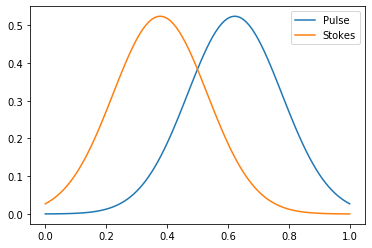

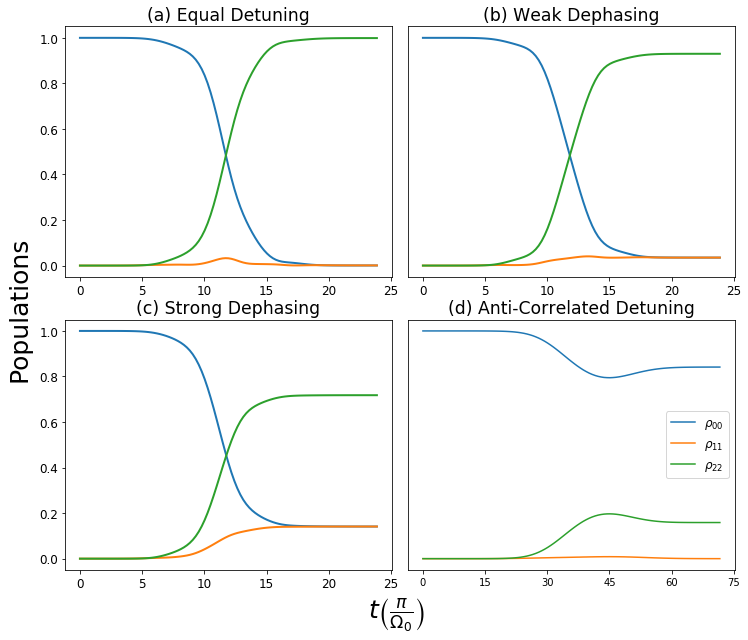

In [16]:
w = 2.0

plot_times = times

plt.figure(5)
plt.plot(plot_times, np.array(pulse)/450*np.pi, label='Pulse')
plt.plot(plot_times, np.array(stokes)/450*np.pi, label='Stokes')
plt.legend()
plt.show()
plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(2,2, height_ratios=[1,1], width_ratios=[1,1], wspace=0.05, hspace=0.17) 


plt.subplot(gs[0,0])
plt.plot(plot_times, populations2[0,:,2], linewidth=w)
plt.plot(plot_times, populations2[1,:,2], linewidth=w)
plt.plot(plot_times, populations2[2,:,2], linewidth=w)
plt.xticks([0,fact*0.2,fact*0.4,fact*0.6,fact*0.8,fact*1],[0,5,10,15,20,25], fontsize=12)
plt.yticks(fontsize=12)
plt.title(r"(a) Equal Detuning", fontsize="xx-large")

plt.subplot(gs[0,1])
plt.plot(plot_times, populations2[0,:,3], linewidth=w)
plt.plot(plot_times, populations2[1,:,3], linewidth=w)
plt.plot(plot_times, populations2[2,:,3], linewidth=w)
plt.xticks([0,fact*0.2,fact*0.4,fact*0.6,fact*0.8,fact*1],[0,5,10,15,20,25], fontsize=12)
plt.yticks([],[])
plt.title("(b) Weak Dephasing", fontsize="xx-large")


plt.subplot(gs[1,0])
plt.plot(plot_times, populations2[0,:,0], linewidth=w)
plt.plot(plot_times, populations2[1,:,0], linewidth=w)
plt.plot(plot_times, populations2[2,:,0], linewidth=w)
plt.xticks([0,fact*0.2,fact*0.4,fact*0.6,fact*0.8,fact*1],[0,5,10,15,20,25], fontsize=12)
plt.yticks(fontsize=12)

plt.title("(c) Strong Dephasing", fontsize="xx-large")

plt.subplot(gs[1,1])
plt.plot(times1, populations3[0,:], label=r"$\rho_{00}$")
plt.plot(times1, populations3[1,:], label=r"$\rho_{11}$")
plt.plot(times1, populations3[2,:], label=r"$\rho_{22}$")
plt.xticks([0,fact*0.6,fact*1.2,fact*1.8,fact*2.4,fact*3],[0,15,30,45,60,75])
plt.yticks([])
plt.legend(fontsize = "large")
plt.title("(d) Anti-Correlated Detuning", fontsize="xx-large")

plt.text(-0.55,-0.26,r"$t  \left( \frac{\pi}{\Omega_{0}} \right)$", fontsize=25)
plt.text(-4.2,0.8,"Populations", fontsize=25, rotation=90);


plt.savefig("/Users/jbrown/OneDrive - Queen's University Belfast/Differentiation/Review_paper/Plots/STIRAP_shortfalls", dpi=300,bbox_inches='tight')

NameError: name 'populations1' is not defined

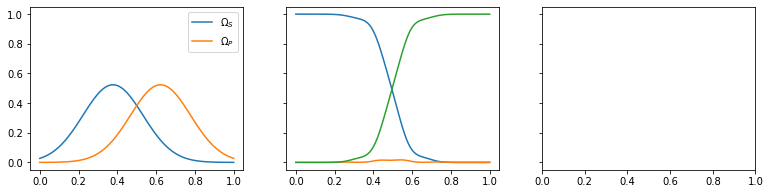

In [7]:


fig, (ax0, ax1, ax2) = plt.subplots(1,3,sharey='row', figsize=(13,3))
#fig.suptitle('Population dynamics induced by Counter-Intuitive Gaussian Pulses')
ax0.plot(times, np.array(stokes)/450*np.pi, label='$\Omega_S$')
ax0.plot(times, np.array(pulse)/450*np.pi, label='$\Omega_P$')


ax0.legend(loc='upper right')
ax1.plot(times, populations[0,:])
ax1.plot(times, populations[1,:])
ax1.plot(times, populations[2,:])

ax2.plot(times, populations1[0,:], label='$ρ_{00}$')
ax2.plot(times, populations1[1,:], label='$ρ_{11}$')
ax2.plot(times, populations1[2,:], label='$ρ_{22}$')


fig.text(0.65, 1, 'Induced Population Dynamics', 
         ha='center', size='x-large')
fig.text(0.23, 0.95, 'Gaussian Control Pulses', 
         ha='center', size='x-large')
fig.text(0.51, 0.9, 'Resonance', 
         ha='center', size='x-large')
fig.text(0.78, 0.9, 'Anti-Correlated Detuning', 
         ha='center', size='x-large')
fig.text(0.5, 0.001, 'Time', ha='center', size='large')
fig.text(0.38, 0.5, 'Population Probability', va='center', rotation='vertical', size='large')
fig.text(0.07, 0.5, '$Ω / Ω_0$', va='center', size='large')
plt.legend()

plt.savefig('STIRAP1.png', dpi=300, bbox_inches='tight')